In [1]:
from pathlib import Path
import pandas as pd

# Get project root by going two levels up from current working directory
project_root = Path.cwd().parents[1]
data_path = project_root / "data" / "01_raw" / "raw_loans.csv"

df = pd.read_csv(data_path)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
q_low_loan_amount = df[" loan_amount"].quantile(0.01)
q_low_loan_amount

700000.0

In [3]:
q_high_loan_amount = df[" loan_amount"].quantile(0.99)
q_high_loan_amount

35700000.0

In [7]:
q_low_residential = df[" residential_assets_value"].quantile(0.01)
q_low_residential

0.0

In [6]:
q_high_residential = df[" residential_assets_value"].quantile(0.99)
q_high_residential

25400000.0

In [8]:
q_low_commercial = df[" commercial_assets_value"].quantile(0.01)
q_low_commercial

0.0

In [9]:
q_high_commercial = df[" commercial_assets_value"].quantile(0.99)
q_high_commercial

16731999.99999997

In [10]:
q_low_luxury = df[" luxury_assets_value"].quantile(0.01)
q_low_luxury

700000.0

In [11]:
q_high_luxury = df[" luxury_assets_value"].quantile(0.99)
q_high_luxury

36031999.99999997

In [12]:
q_low_bank = df[" bank_asset_value"].quantile(0.01)
q_low_bank

200000.0

In [13]:
q_high_bank = df[" bank_asset_value"].quantile(0.99)
q_high_bank

13100000.0

In [11]:
percentiles = df.describe(percentiles=[0.01, 0.99])
percentiles.loc[["1%", "99%"]]

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1%,43.68,0.0,300000.0,700000.0,2.0,304.00,0.0,0.0,700000.0,200000.0
99%,4226.32,5.0,9800000.0,35700000.0,20.0,894.32,25400000.0,16732000.0,36032000.0,13100000.0


In [3]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [4]:
df = df.set_index('loan_id')
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [7]:
# Display summary statistics of numeric columns
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
# Display summary statistics for categorical columns
df.describe(include='O')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [9]:
# Check for missing values in the dataset
print(df.isnull().sum())

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [10]:
# Check the names of the columns (each column's name has a " " prefix)
df.columns


Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
# Class imbalance in the dataset
df[' loan_status'].value_counts(normalize=True)


 loan_status
 Approved    0.62216
 Rejected    0.37784
Name: proportion, dtype: float64

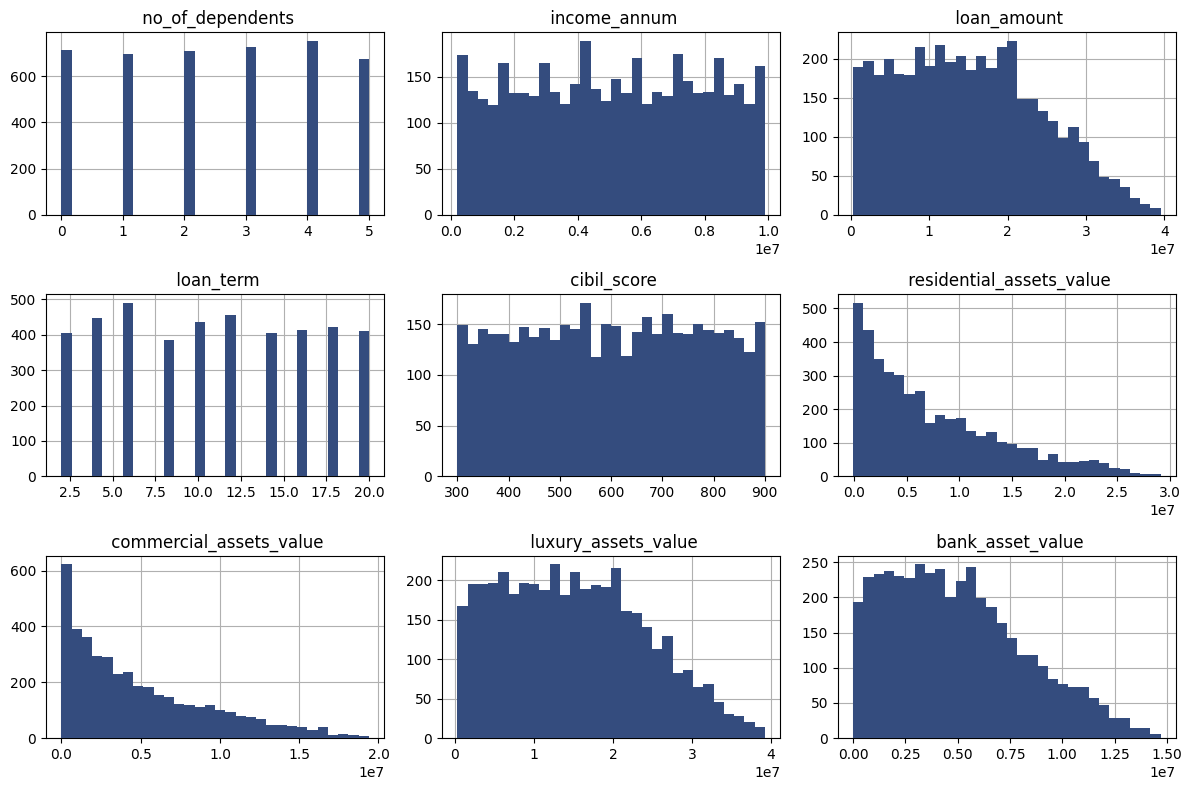

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
axes = df[numeric_cols].hist(figsize=(12,8), bins=30, color='#344c7e')

for ax in axes.flatten():
    ax.grid(True, zorder=0)       # grid behind the bars
    for patch in ax.patches:
        patch.set_zorder(3)       # bars on top of the grid

plt.tight_layout()
plt.show()

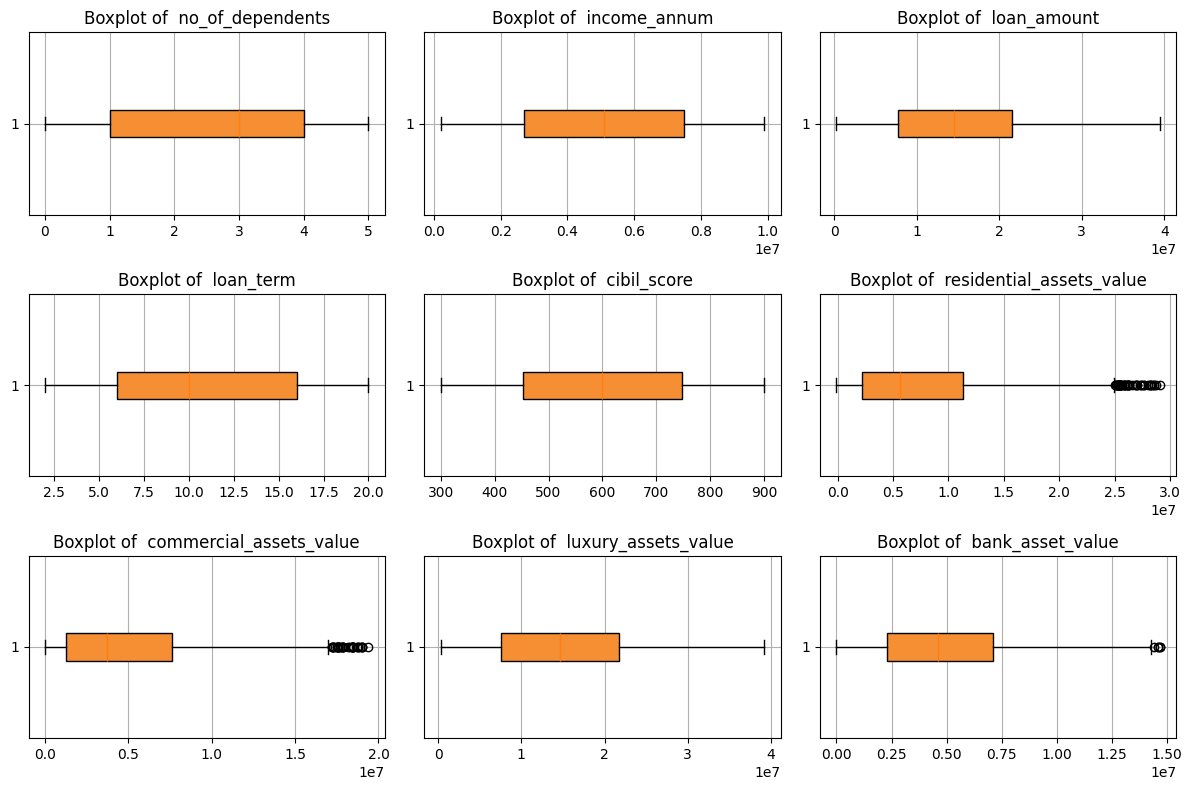

In [13]:
# Determine grid size
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor='#f68e34'))
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(True, zorder=0)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

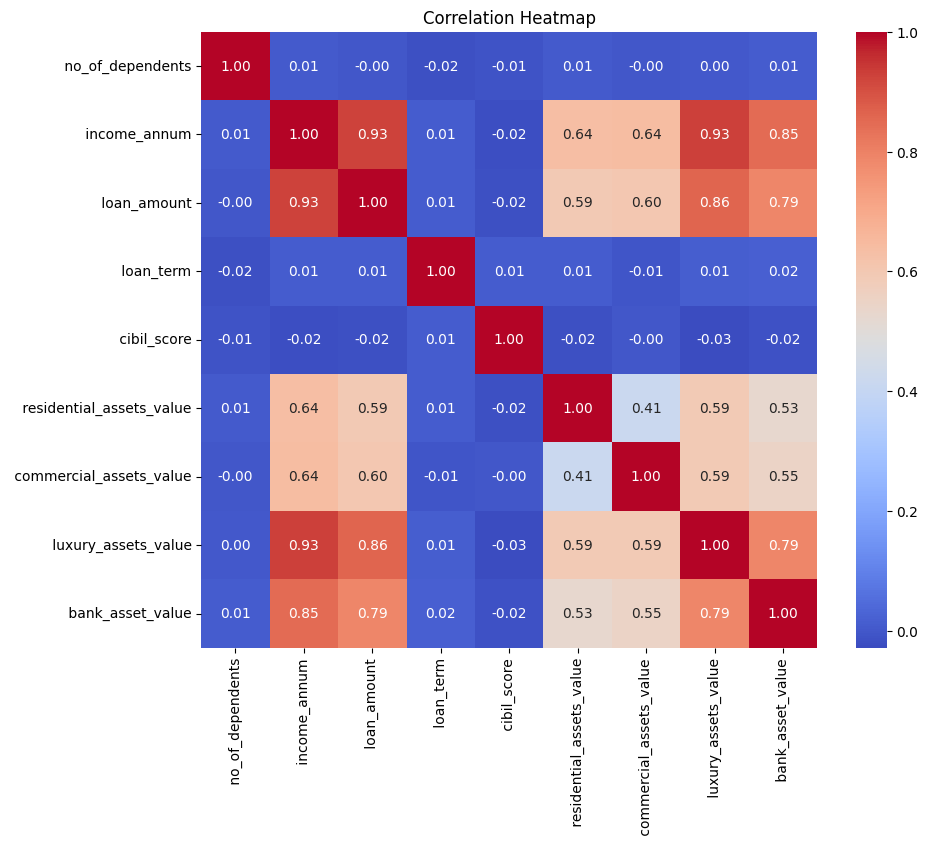

In [14]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

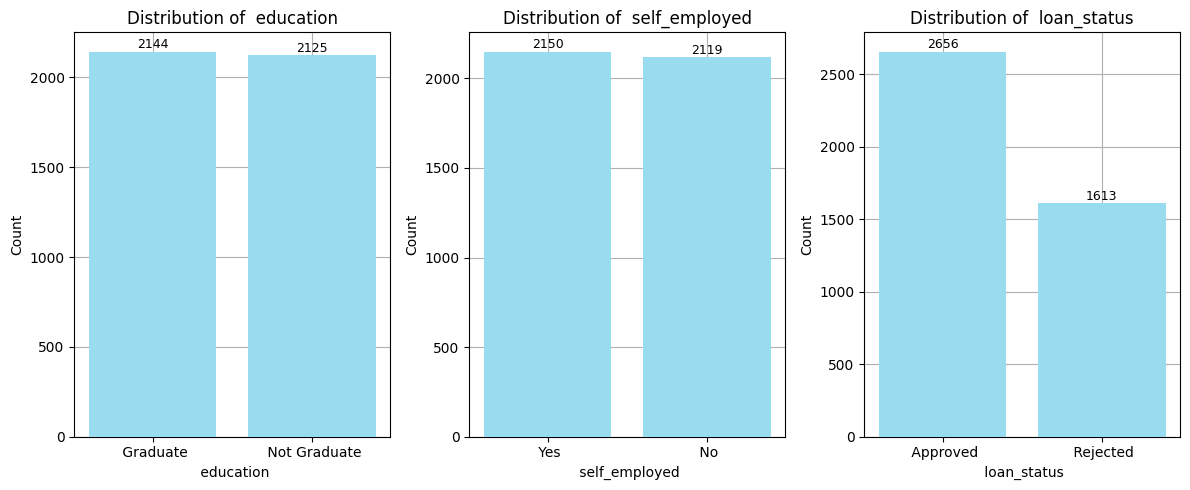

In [15]:
categorical_cols = df.select_dtypes(include="object").columns

# Calculate number of rows and columns for subplots
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()
    bars = axes[i].bar(counts.index, counts.values, color='#99dcf0', zorder=3)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, zorder=0)
    axes[i].set_xticks(range(len(counts.index)))
    axes[i].set_xticklabels(counts.index)

    # Add count labels above each bar
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height + 0.001 * height,
                     f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

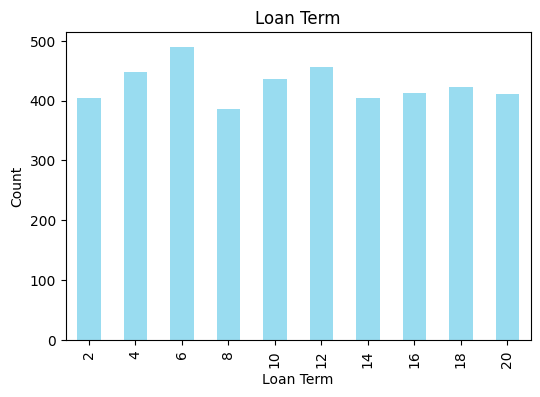

In [16]:
# loan_term
plt.figure(figsize=(6, 4))
df[' loan_term'].value_counts().sort_index().plot(kind='bar', color='#99dcf0')
plt.title('Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

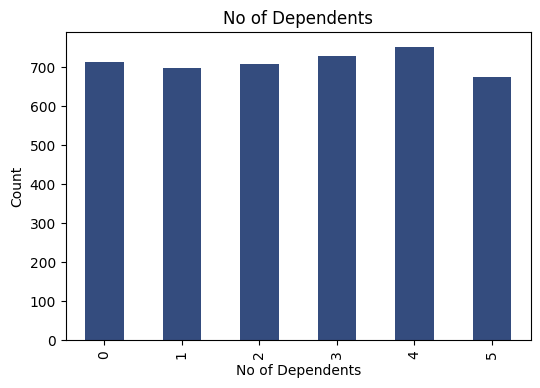

In [17]:
# no_of_dependents
plt.figure(figsize=(6, 4))
df[' no_of_dependents'].value_counts().sort_index().plot(kind='bar', color='#344c7e')
plt.title('No of Dependents')
plt.xlabel('No of Dependents')
plt.ylabel('Count')
plt.show()

In [18]:
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [19]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [20]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)